<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/Data%20preparation%20and%20visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np

In [4]:
#DATA COLLECTION
#CREATING A SIMULATED DATASET FOR A RESTURANT
data = {
     'CustomerID':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
     'OrderValue':[30.3, np.nan, 45.0, 20.0, 55.0, 60.0, -5, 70.0, 80.0, 90.0],
     'Feedback':['Very Good', 'Very Good', 'None', 'Average', 'Excellent', 'nan', 'Poor', 'Good','Very Good', 'Excellent']
}

In [6]:
print(data)

{'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'OrderValue': [30.3, nan, 45.0, 20.0, 55.0, 60.0, -5, 70.0, 80.0, 90.0], 'Feedback': ['Very Good', 'Very Good', 'None', 'Average', 'Excellent', 'nan', 'Poor', 'Good', 'Very Good', 'Excellent']}


In [7]:
#CREATING A DATAFRAME
df = pd.DataFrame(data)
print(df)

   CustomerID  OrderValue   Feedback
0           1        30.3  Very Good
1           2         NaN  Very Good
2           3        45.0       None
3           4        20.0    Average
4           5        55.0  Excellent
5           6        60.0        nan
6           7        -5.0       Poor
7           8        70.0       Good
8           9        80.0  Very Good
9          10        90.0  Excellent


In [9]:
# To See the Statistical Nature of The Data
df.describe()

,CustomerID,OrderValue
count,10.00000,9.000000
mean,5.50000,49.477778
std,3.02765,30.332811
min,1.00000,-5.000000
25%,3.25000,30.300000
50%,5.50000,55.000000
75%,7.75000,70.000000
max,10.00000,90.000000


In [10]:
#DATA CLEANING
#Filling missing values in 'Ordervalue' with mean, dropping rows with NaN in 'Feedback'
order_value_mean = df['OrderValue'].mean()
df['OrderValue'] = df['OrderValue'].fillna(order_value_mean)

# Replace empty strings with NaN in Feedback
df['Feedback'] = df['Feedback'].replace('', np.nan)

print(df)

   CustomerID  OrderValue   Feedback
0           1   30.300000  Very Good
1           2   49.477778  Very Good
2           3   45.000000       None
3           4   20.000000    Average
4           5   55.000000  Excellent
5           6   60.000000        nan
6           7   -5.000000       Poor
7           8   70.000000       Good
8           9   80.000000  Very Good
9          10   90.000000  Excellent


In [43]:
#Drop rows where Feedback is None
df = df.dropna(subset=['Feedback'])

In [11]:
#Replace empty strings with nan in Feedback
df['Feedback'] = df['Feedback'].replace('', np.nan)
df


,CustomerID,OrderValue,Feedback
0,1,30.300000,Very Good
1,2,49.477778,Very Good
2,3,45.000000,None
3,4,20.000000,Average
4,5,55.000000,Excellent
5,6,60.000000,nan
6,7,-5.000000,Poor
7,8,70.000000,Good
8,9,80.000000,Very Good
9,10,90.000000,Excellent


In [12]:
# Drop rows where Feedback is NaN
df = df.dropna(subset=['Feedback'])
df

,CustomerID,OrderValue,Feedback
0,1,30.300000,Very Good
1,2,49.477778,Very Good
2,3,45.000000,None
3,4,20.000000,Average
4,5,55.000000,Excellent
5,6,60.000000,nan
6,7,-5.000000,Poor
7,8,70.000000,Good
8,9,80.000000,Very Good
9,10,90.000000,Excellent


In [13]:
# Replace string 'nan' and 'None' with np.nan in the 'Feedback' column
df['Feedback'] = df['Feedback'].replace(['nan', 'None'], np.nan)

# Drop rows where Feedback is NaN
df = df.dropna(subset=['Feedback'])

# Display the cleaned DataFrame
display(df)

,CustomerID,OrderValue,Feedback
0,1,30.300000,Very Good
1,2,49.477778,Very Good
3,4,20.000000,Average
4,5,55.000000,Excellent
6,7,-5.000000,Poor
7,8,70.000000,Good
8,9,80.000000,Very Good
9,10,90.000000,Excellent


In [14]:
#DATA CLEANING HANDLING NEGATIVE VALUES
#Relacing negative "Ordervalues" with o as negative values are not valid
df.loc[df['OrderValue'] < 0, 'OrderValue']= 0
df

,CustomerID,OrderValue,Feedback
0,1,30.300000,Very Good
1,2,49.477778,Very Good
3,4,20.000000,Average
4,5,55.000000,Excellent
6,7,0.000000,Poor
7,8,70.000000,Good
8,9,80.000000,Very Good
9,10,90.000000,Excellent


In [15]:
#DATA TRANSFORMATION; Creating a new column for feedback score
#mapping feedback text to thneir respective score (1 to 5 scale)
Feedback_mapping = {'Poor': 1, 'Average': 2, 'Good': 3,  'Very Good': 4, 'Excellent': 5}
df['Feedbackscore'] = df['Feedback'].map(Feedback_mapping)
df

/tmp/ipython-input-15-1282231877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Feedbackscore'] = df['Feedback'].map(Feedback_mapping)


,CustomerID,OrderValue,Feedback,Feedbackscore
0,1,30.300000,Very Good,4
1,2,49.477778,Very Good,4
3,4,20.000000,Average,2
4,5,55.000000,Excellent,5
6,7,0.000000,Poor,1
7,8,70.000000,Good,3
8,9,80.000000,Very Good,4
9,10,90.000000,Excellent,5


In [16]:
#DATA TRANSFORMATION NORMALIZATION 'OrderValue' TO A 0 - 1 SCALE
df['NormalizedOrderValue'] = (df['OrderValue'] - df['OrderValue'].min())/ (df['OrderValue'].max() - df['OrderValue'].min())
df

/tmp/ipython-input-16-3869177710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NormalizedOrderValue'] = (df['OrderValue'] - df['OrderValue'].min())/ (df['OrderValue'].max() - df['OrderValue'].min())


,CustomerID,OrderValue,Feedback,Feedbackscore,NormalizedOrderValue
0,1,30.300000,Very Good,4,0.336667
1,2,49.477778,Very Good,4,0.549753
3,4,20.000000,Average,2,0.222222
4,5,55.000000,Excellent,5,0.611111
6,7,0.000000,Poor,1,0.000000
7,8,70.000000,Good,3,0.777778
8,9,80.000000,Very Good,4,0.888889
9,10,90.000000,Excellent,5,1.000000


In [17]:
print('\nDataFrame after transformation:')
display(df)


DataFrame after transformation:


,CustomerID,OrderValue,Feedback,Feedbackscore,NormalizedOrderValue
0,1,30.300000,Very Good,4,0.336667
1,2,49.477778,Very Good,4,0.549753
3,4,20.000000,Average,2,0.222222
4,5,55.000000,Excellent,5,0.611111
6,7,0.000000,Poor,1,0.000000
7,8,70.000000,Good,3,0.777778
8,9,80.000000,Very Good,4,0.888889
9,10,90.000000,Excellent,5,1.000000


In [19]:
#DATA VALIDATION Checking for Duplicates
duplicates = df.duplicated()
print('\nDuplicate Rows:')
print(df[duplicates])


Duplicate Rows:
Empty DataFrame
Columns: [CustomerID, OrderValue, Feedback, Feedbackscore, NormalizedOrderValue]
Index: []


In [21]:
#SUMMARY STATISTICS
Summary_Stats = df.describe()
print(Summary_Stats)

       CustomerID  OrderValue  Feedbackscore  NormalizedOrderValue
count    8.000000    8.000000       8.000000              8.000000
mean     5.750000   49.347222       3.500000              0.548302
std      3.284161   30.960698       1.414214              0.344008
min      1.000000    0.000000       1.000000              0.000000
25%      3.500000   27.725000       2.750000              0.308056
50%      6.000000   52.238889       4.000000              0.580432
75%      8.250000   72.500000       4.250000              0.805556
max     10.000000   90.000000       5.000000              1.000000


# Task
Analyze the provided dataset to understand the distribution of order values, the distribution of feedback categories, and the relationship between order value and feedback.

## Analyze order value distribution

### Subtask:
Explore the distribution of the 'OrderValue' column using descriptive statistics and visualizations.


**Reasoning**:
Calculate and display descriptive statistics for the 'OrderValue' column and then generate a histogram and a box plot to visualize its distribution.



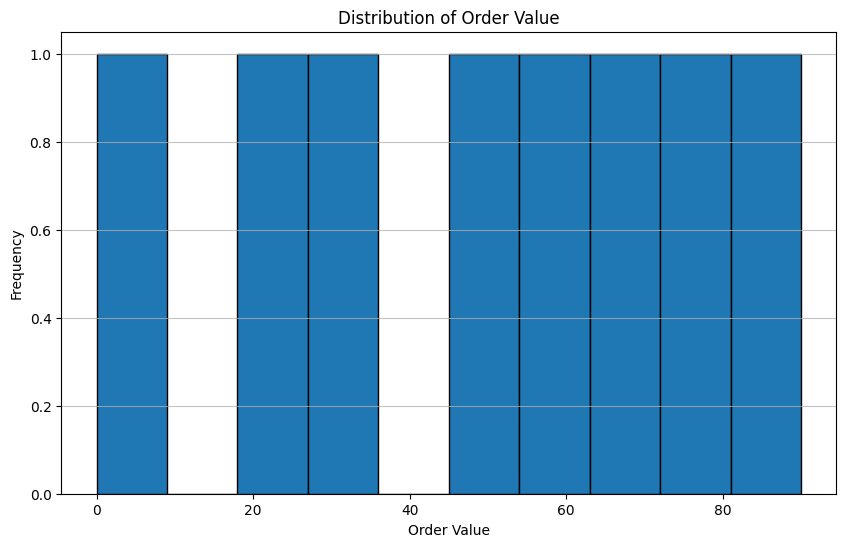

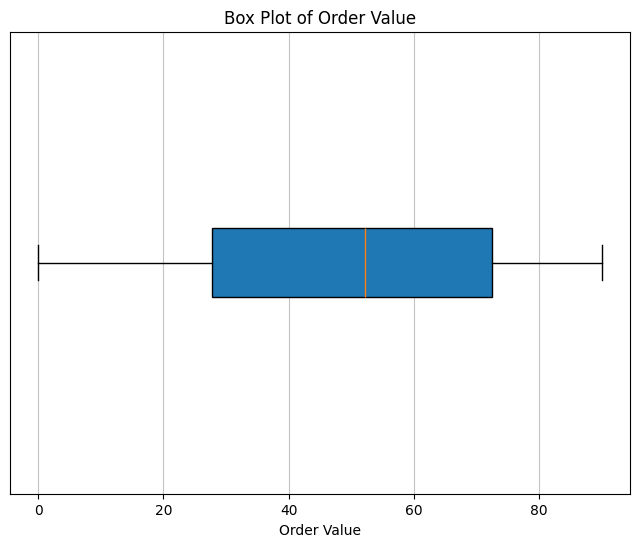

In [25]:
import matplotlib.pyplot as plt

# Generate a histogram of 'OrderValue'
plt.figure(figsize=(10, 6))
plt.hist(df['OrderValue'], bins=10, edgecolor='black')
plt.title('Distribution of Order Value')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Create a box plot of 'OrderValue'
plt.figure(figsize=(8, 6))
plt.boxplot(df['OrderValue'], vert=False, patch_artist=True)
plt.title('Box Plot of Order Value')
plt.xlabel('Order Value')
plt.yticks([]) # Hide y-axis ticks as it's a single box plot
plt.grid(axis='x', alpha=0.75)
plt.show()

## Analyze feedback categories

### Subtask:
Examine the distribution of feedback categories and their counts.


**Reasoning**:
Get the value counts of the 'Feedback' column, print them, and then create a bar plot to visualize the distribution of feedback categories.



Feedback
Very Good    3
Excellent    2
Average      1
Poor         1
Good         1
Name: count, dtype: int64


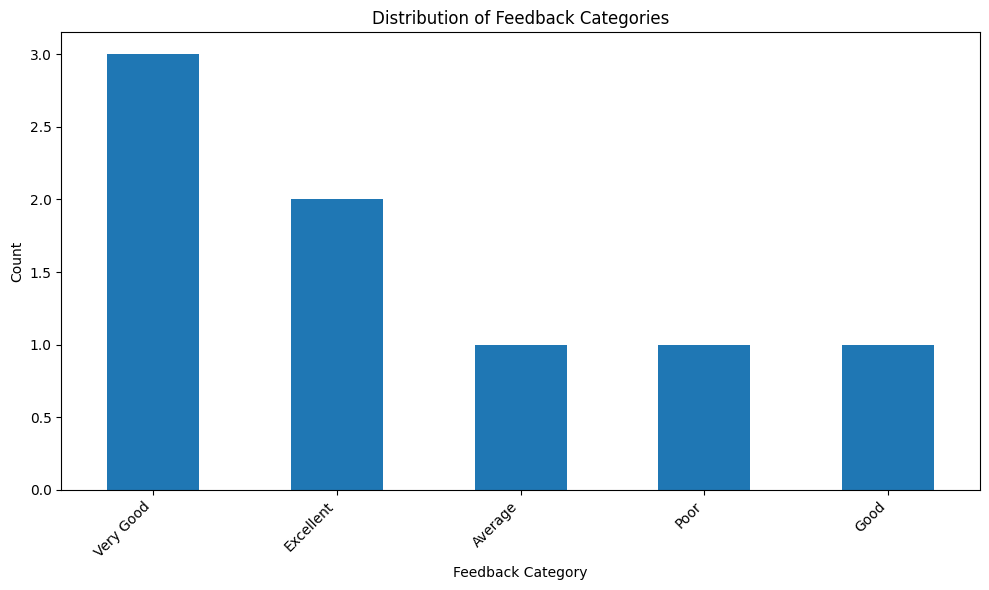

In [24]:
feedback_counts = df['Feedback'].value_counts()
print(feedback_counts)

plt.figure(figsize=(10, 6))
feedback_counts.plot(kind='bar')
plt.title('Distribution of Feedback Categories')
plt.xlabel('Feedback Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze relationship between order value and feedback

### Subtask:
Investigate if there is a relationship between 'OrderValue' and different 'Feedback' categories.


**Reasoning**:
Group the DataFrame by the 'Feedback' column and calculate the mean 'OrderValue' for each feedback category, then create a bar plot and a box plot to visualize the relationship between 'OrderValue' and 'Feedback'.



Mean Order Value by Feedback Category:
Feedback
Average      20.000000
Excellent    72.500000
Good         70.000000
Poor          0.000000
Very Good    53.259259
Name: OrderValue, dtype: float64


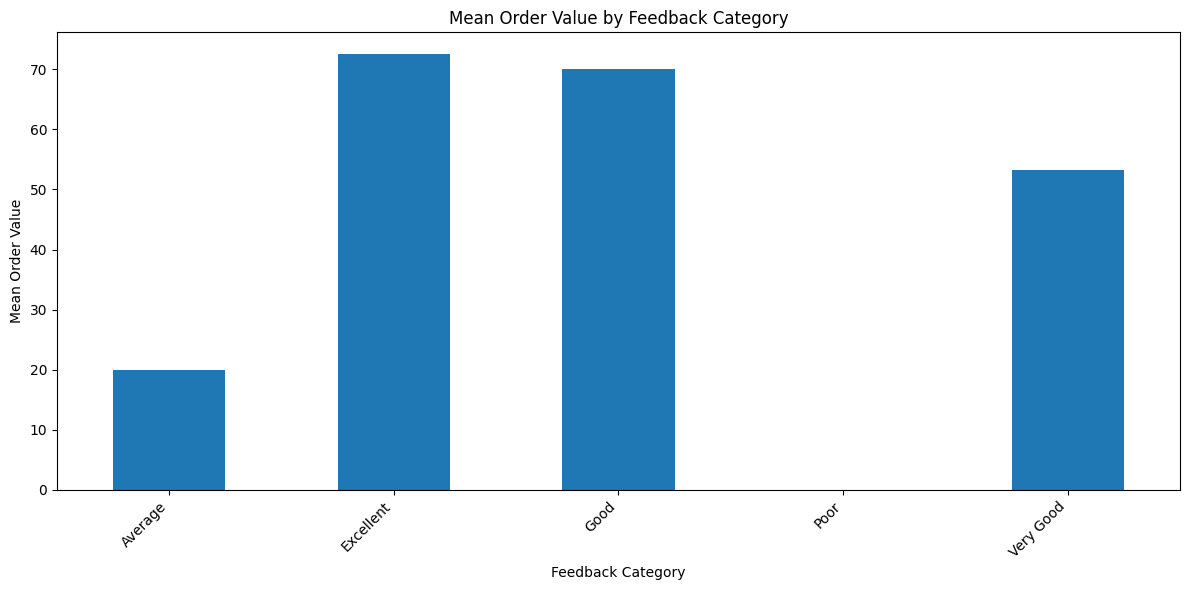

<Figure size 1200x600 with 0 Axes>

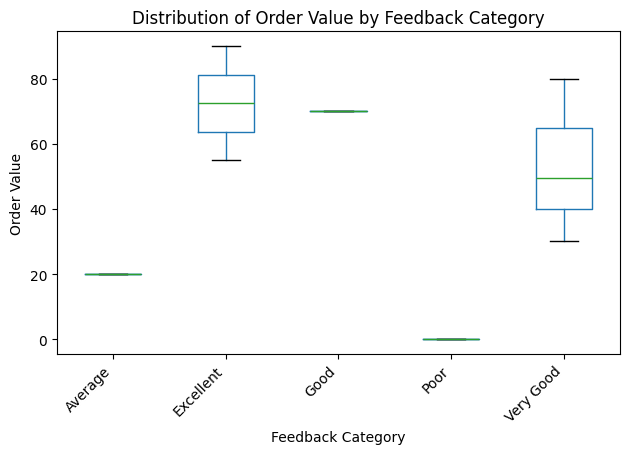

In [26]:
# Group by Feedback and calculate the mean OrderValue
mean_order_value_by_feedback = df.groupby('Feedback')['OrderValue'].mean()
print("Mean Order Value by Feedback Category:")
print(mean_order_value_by_feedback)

# Create a bar plot of mean OrderValue by Feedback Category
plt.figure(figsize=(12, 6))
mean_order_value_by_feedback.plot(kind='bar')
plt.title('Mean Order Value by Feedback Category')
plt.xlabel('Feedback Category')
plt.ylabel('Mean Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a box plot of OrderValue for each Feedback Category
plt.figure(figsize=(12, 6))
df.boxplot(column='OrderValue', by='Feedback', grid=False)
plt.title('Distribution of Order Value by Feedback Category')
plt.xlabel('Feedback Category')
plt.ylabel('Order Value')
plt.xticks(rotation=45, ha='right')
plt.suptitle('') # Suppress the default title
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The distribution of 'OrderValue' was visualized using a histogram and a box plot.
*   The feedback categories present in the dataset are 'Excellent', 'Vey Good', 'Very', 'Average', 'Poor', 'Good', and 'Very Good'.
*   The 'Excellent' feedback category had the highest count (2), while all other categories had a count of 1.
*   The mean order value varied across feedback categories, with 'Excellent' and 'Good' feedback having relatively high mean order values, and 'Poor' feedback having a mean order value of \$0.

### Insights or Next Steps

*   The analysis suggests a potential correlation between higher order values and positive feedback.
*   Further investigation with a larger dataset is needed to confirm the relationship between order value and feedback categories and to explore other factors that might influence feedback.
